In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
data = pd.read_csv("./서울최종.csv", encoding='cp949')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,station_id,station_name,subway,complex,market,before,after
0,119000104,7호선장승배기역.상도2치안센터,1,0,2,7544,8000
1,119000104,7호선장승배기역.상도2치안센터,1,0,2,7633,6686
2,119000104,7호선장승배기역.상도2치안센터,1,0,2,8851,8644
3,119000104,7호선장승배기역.상도2치안센터,1,0,2,8365,8804
4,119000104,7호선장승배기역.상도2치안센터,1,0,2,8184,9153


In [3]:
x_data = data[['subway', 'complex', 'market', 'before']]
y_data = data['after']

print(x_data.shape, y_data.shape)

(2160, 4) (2160,)


In [4]:
#피처 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
x_data_scaled = scaler.fit_transform(x_data)

In [5]:
from sklearn.model_selection import train_test_split

#데이터 나누기
x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=10)

print('x_train shape:', x_train.shape, '\nx_test shape:', x_test.shape)

x_train shape: (1728, 4) 
x_test shape: (432, 4)


In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

def build_model(num_input=1) :
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=num_input))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer = 'adam', loss='mse', metrics=['mae'])

    return model

model = build_model(num_input = 4)
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               640       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [32]:
# 모델 훈련
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
54/54 - 0s - loss: 14158150.0000 - mae: 2043.7540
Epoch 2/50
54/54 - 0s - loss: 14494330.0000 - mae: 2109.8799
Epoch 3/50
54/54 - 0s - loss: 13857299.0000 - mae: 2045.4646
Epoch 4/50
54/54 - 0s - loss: 14687912.0000 - mae: 2085.7246
Epoch 5/50
54/54 - 0s - loss: 14010016.0000 - mae: 2009.1709
Epoch 6/50
54/54 - 0s - loss: 13847554.0000 - mae: 2025.1837
Epoch 7/50
54/54 - 0s - loss: 13899375.0000 - mae: 2030.3837
Epoch 8/50
54/54 - 0s - loss: 14005086.0000 - mae: 2039.6686
Epoch 9/50
54/54 - 0s - loss: 14162690.0000 - mae: 2035.2837
Epoch 10/50
54/54 - 0s - loss: 14446012.0000 - mae: 2057.8689
Epoch 11/50
54/54 - 0s - loss: 14145737.0000 - mae: 2071.6831
Epoch 12/50
54/54 - 0s - loss: 14029639.0000 - mae: 2042.7513
Epoch 13/50
54/54 - 0s - loss: 15170085.0000 - mae: 2150.6973
Epoch 14/50
54/54 - 0s - loss: 15023074.0000 - mae: 2109.2263
Epoch 15/50
54/54 - 0s - loss: 14463252.0000 - mae: 2037.0188
Epoch 16/50
54/54 - 0s - loss: 13952934.0000 - mae: 2021.7548
Epoch 17/50
54/54

In [33]:
#평가
model.evaluate(x_test, y_test)

14/14 [==============================] - 0s 1ms/step - loss: 16853116.0000 - mae: 1978.5154


[16853116.0, 1978.515380859375]

In [34]:
#교차검증
model = build_model(num_input=4)
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.25, verbose=2)

Epoch 1/50
41/41 - 1s - loss: 279720864.0000 - mae: 10628.2002 - val_loss: 13404700.0000 - val_mae: 1986.5635
Epoch 2/50
41/41 - 0s - loss: 16112849.0000 - mae: 2205.1912 - val_loss: 14558554.0000 - val_mae: 2109.3115
Epoch 3/50
41/41 - 0s - loss: 14033171.0000 - mae: 2038.3018 - val_loss: 15621713.0000 - val_mae: 2212.5725
Epoch 4/50
41/41 - 0s - loss: 14216552.0000 - mae: 2023.6041 - val_loss: 13418021.0000 - val_mae: 1988.7651
Epoch 5/50
41/41 - 0s - loss: 14349889.0000 - mae: 2050.5649 - val_loss: 13448910.0000 - val_mae: 1987.1189
Epoch 6/50
41/41 - 0s - loss: 14003619.0000 - mae: 2042.7747 - val_loss: 13737733.0000 - val_mae: 2023.1752
Epoch 7/50
41/41 - 0s - loss: 13878654.0000 - mae: 2076.7944 - val_loss: 13430249.0000 - val_mae: 1985.8242
Epoch 8/50
41/41 - 0s - loss: 14009693.0000 - mae: 2038.8021 - val_loss: 13517009.0000 - val_mae: 1999.1782
Epoch 9/50
41/41 - 0s - loss: 13754507.0000 - mae: 2030.9506 - val_loss: 13529340.0000 - val_mae: 2000.4291
Epoch 10/50
41/41 - 0s - l

<function matplotlib.pyplot.show(close=None, block=None)>

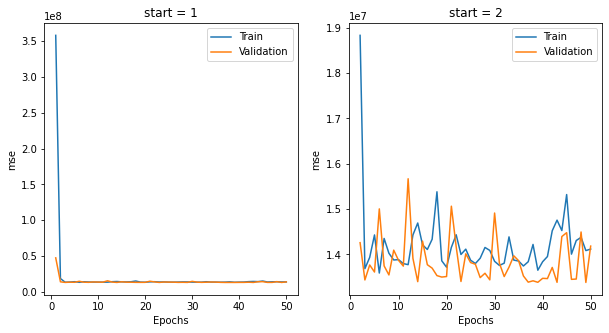

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

ax1 = plt.subplot(1,2,1)
ax1.plot(range(1, 51), history.history['loss'][0 : 50], label='Train')
ax1.plot(range(1, 51), history.history['val_loss'][0 : 50], label='Validation')
ax1.legend()

plt.title('start = 1')
plt.xlabel('Epochs')
plt.ylabel('mse')

ax2 = plt.subplot(1,2,2)
ax2.plot(range2, 51), history.history['loss'][1 : 50], label='Train')
ax2.plot(range(2, 51), history.history['val_loss'][1 : 50], label='Validation')
ax2.legend()

plt.title('start = 2')
plt.xlabel('Epochs')
plt.ylabel('mse')

plt.show
